In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [6]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [17]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
Churned_W                    0
dtype: int64

In [18]:
df. head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Churned_W
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,Neg
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,Neg
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,Neg
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,Neg
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,Neg


In [25]:
from datetime import datetime
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'], errors='coerce')
fixed_end_date = pd.to_datetime('2024-05-25')
df['Subscription_End_Date'] = np.where(df['Churned'] == 1, df['Date_of_Churn'], fixed_end_date)

In [26]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Churned_W,Subscription_End_Date
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,Neg,2024-05-25 00:00:00
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,Neg,2024-05-25 00:00:00
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,Neg,2024-05-25 00:00:00
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,Neg,2024-05-25 00:00:00
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,Neg,2024-05-25 00:00:00


In [30]:
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'], errors='coerce')
df['Subscription_End_Date'] = pd.to_datetime(df['Subscription_End_Date'], errors='coerce')

In [31]:
df['tenure_days'] = (df['Subscription_End_Date'] - df['Subscription_Start_Date']).dt.days

In [33]:
churn_rate = df.groupby('Subscription_Type')['Churned'].mean()
churn_rate

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

In [47]:
df.groupby('Churned')['tenure_days'].median()

Churned
0    971.5
1    201.0
Name: tenure_days, dtype: float64

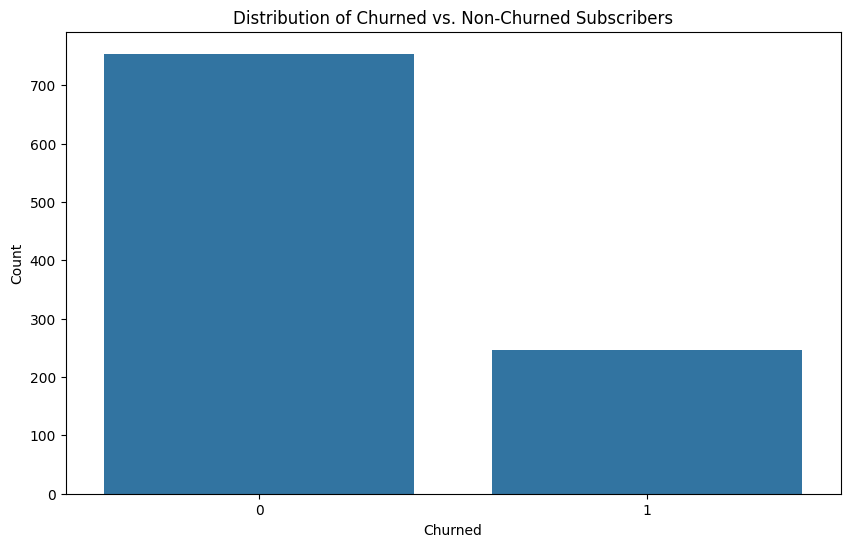

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churned', data=df)
plt.title('Distribution of Churned vs. Non-Churned Subscribers')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

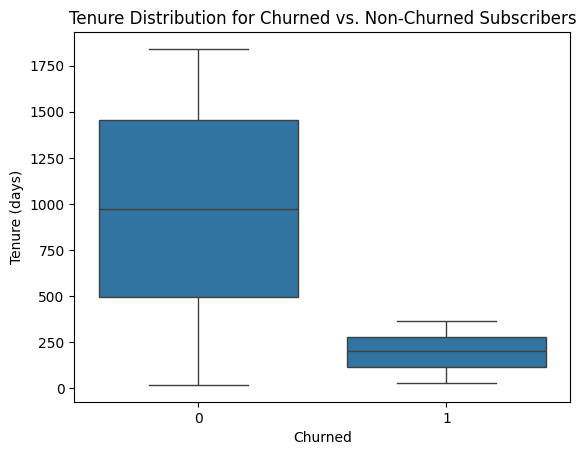

In [34]:
sns.boxplot(x='Churned', y='tenure_days', data=df)
plt.title('Tenure Distribution for Churned vs. Non-Churned Subscribers')
plt.xlabel('Churned')
plt.ylabel('Tenure (days)')
plt.show()

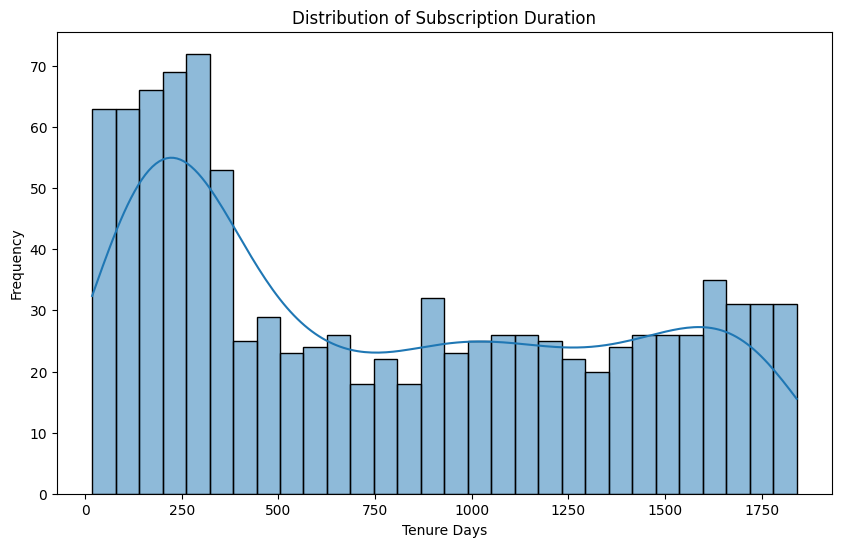

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure_days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Subscription Duration')
plt.xlabel('Tenure Days')
plt.ylabel('Frequency')
plt.show()

In [50]:
df.groupby('Churned')['Rating_Given'].mean()

Churned
0    3.0
1    2.0
Name: Rating_Given, dtype: float64

In [51]:
df.groupby('Churned')['Rating_Given'].median()

Churned
0    3.0
1    2.0
Name: Rating_Given, dtype: float64

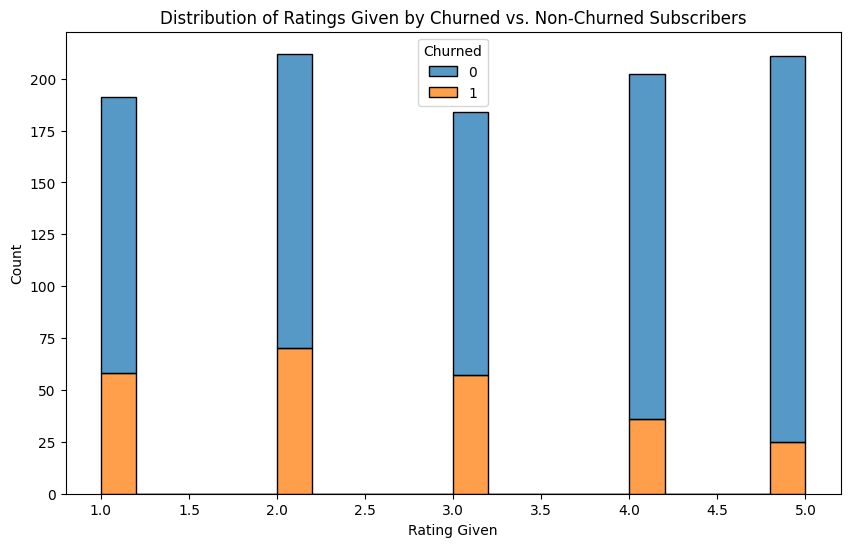

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Rating_Given', hue='Churned', multiple='stack', bins=20)
plt.title('Distribution of Ratings Given by Churned vs. Non-Churned Subscribers')
plt.xlabel('Rating Given')
plt.ylabel('Count')
plt.show()

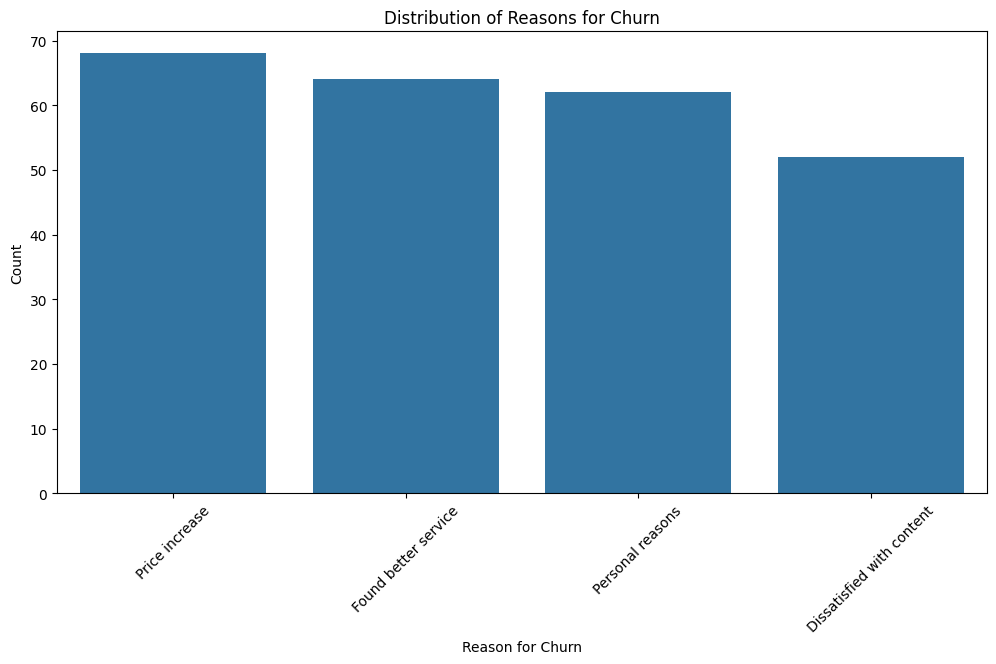

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Reason_for_Churn', data=df, order=df['Reason_for_Churn'].value_counts().index)
plt.title('Distribution of Reasons for Churn')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

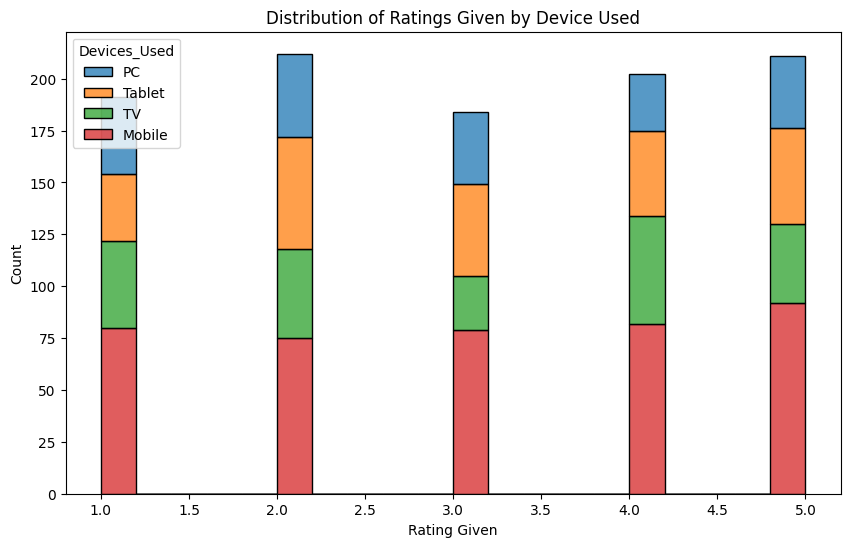

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Rating_Given', hue='Devices_Used', multiple='stack', bins=20)
plt.title('Distribution of Ratings Given by Device Used')
plt.xlabel('Rating Given')
plt.ylabel('Count')
plt.show()

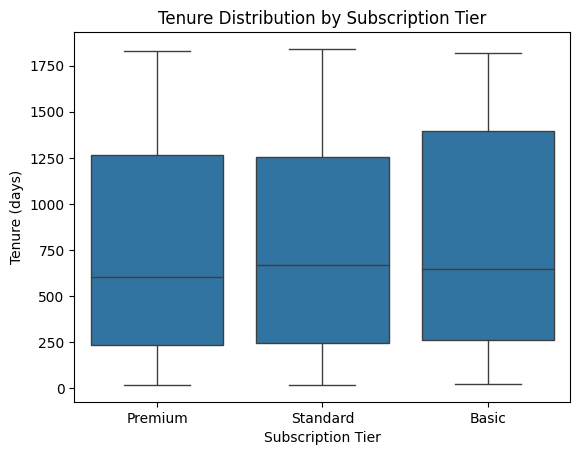

In [35]:
sns.boxplot(x='Subscription_Type', y='tenure_days', data=df)
plt.title('Tenure Distribution by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Tenure (days)')
plt.show()

In [60]:
churn_rate_type = df.groupby('Subscription_Type')['Churned'].mean()
churn_rate_type

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

In [42]:
churn_rate_device = df.groupby('Devices_Used')['Churned'].mean()
churn_rate_device

Devices_Used
Mobile    0.321078
PC        0.155172
TV        0.218905
Tablet    0.202765
Name: Churned, dtype: float64

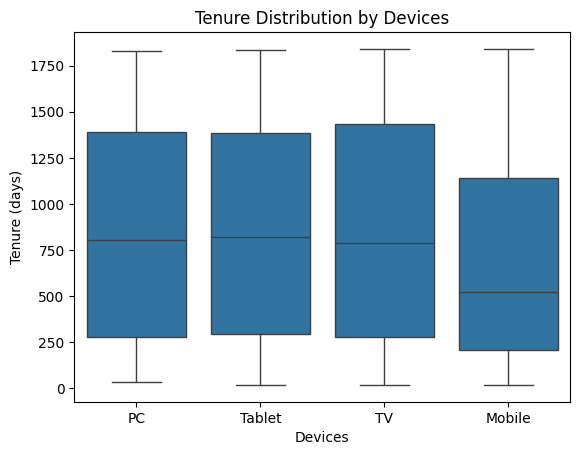

In [43]:
sns.boxplot(x='Devices_Used', y='tenure_days', data=df)
plt.title('Tenure Distribution by Devices')
plt.xlabel('Devices')
plt.ylabel('Tenure (days)')
plt.show()

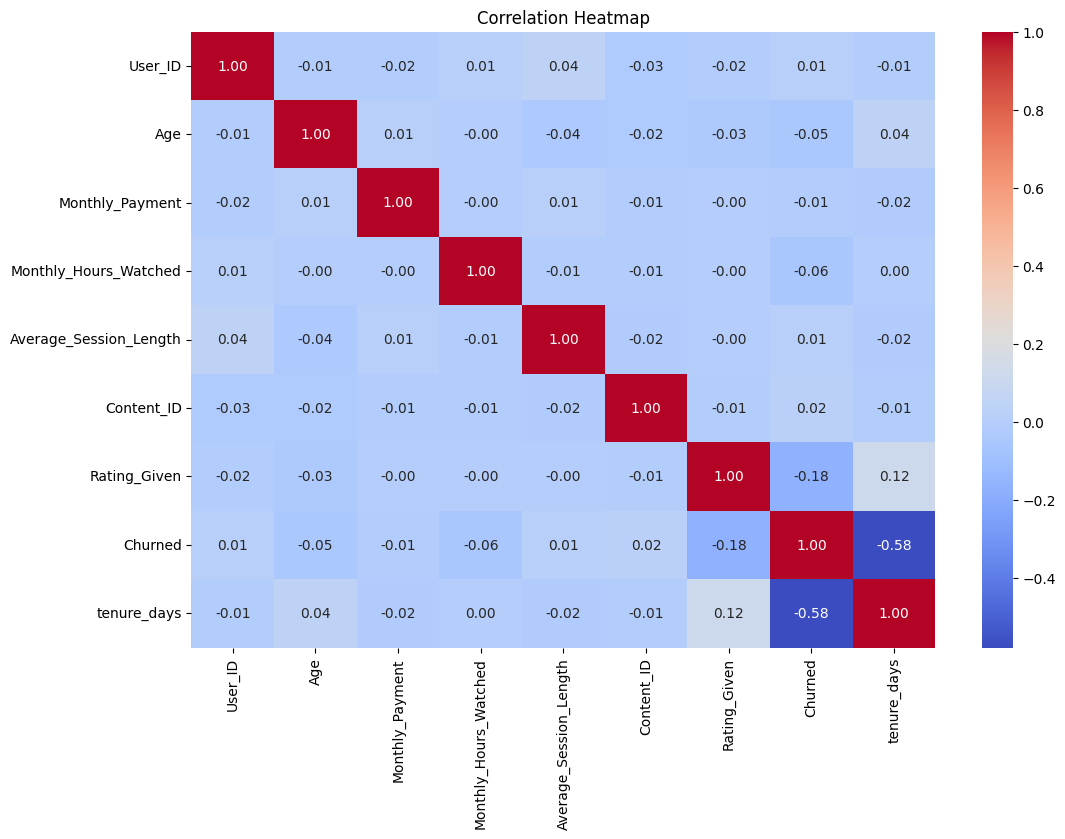

In [39]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
total_revenue = df['Monthly_Payment'].sum()

In [78]:
total_users = df['User_ID'].nunique()
total_users

1000

In [77]:
avg_rev = total_revenue / total_users

In [74]:
target_reduction_churn_rate = 0.1
mobile_churn_rate = max(churn_rate_device)
current_churn_rate = mobile_churn_rate - target_reduction_churn_rate
current_churn_rate

0.22107843137254904

In [75]:
retained_subscribers = total_users * current_churn_rate
retained_subscribers


221.07843137254903

In [76]:

annual_revenue_gain = retained_subscribers * avg_rev
annual_revenue_gain

3223.3235294117653